In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy as np
import tensorflow as tf
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras.preprocessing.text import text_to_word_sequence
 
#한번봐두면좋은사이트
#https://tfhub.dev/google/Wiki-words-250-with-normalization/2
#http://colah.github.io/posts/2015-08-Understanding-LSTMs/

In [21]:
text = '해보지 않으면 해낼 수 없다'
result = text_to_word_sequence(text)
print(result)

['해보지', '않으면', '해낼', '수', '없다']


In [10]:
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.', '텍스트의 단어로 토큰화해야 딥러닝에서 인식됩니다.', '토큰화한 결과는 딥러닝에서 사용할 수 있습니다.',]

In [11]:
token = Tokenizer()         # 토큰화 함수 지정
token.fit_on_texts(docs)    # 토큰화 함수에 문장 적용
print(token.word_counts)    # 단어의 빈도 수를 계산한 결과 출력

OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 1), ('합니다', 1), ('단어로', 1), ('토큰화해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('토큰화한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])


In [12]:
print(token.document_count)

3


In [13]:
print(token.word_docs)

defaultdict(<class 'int'>, {'토큰화': 1, '텍스트의': 2, '나누어': 1, '각': 1, '단어를': 1, '먼저': 1, '합니다': 1, '토큰화해야': 1, '딥러닝에서': 2, '인식됩니다': 1, '단어로': 1, '있습니다': 1, '결과는': 1, '토큰화한': 1, '사용할': 1, '수': 1})


In [14]:
token.word_counts

OrderedDict([('먼저', 1),
             ('텍스트의', 2),
             ('각', 1),
             ('단어를', 1),
             ('나누어', 1),
             ('토큰화', 1),
             ('합니다', 1),
             ('단어로', 1),
             ('토큰화해야', 1),
             ('딥러닝에서', 2),
             ('인식됩니다', 1),
             ('토큰화한', 1),
             ('결과는', 1),
             ('사용할', 1),
             ('수', 1),
             ('있습니다', 1)])

In [16]:
print(token.word_index)

{'텍스트의': 1, '딥러닝에서': 2, '먼저': 3, '각': 4, '단어를': 5, '나누어': 6, '토큰화': 7, '합니다': 8, '단어로': 9, '토큰화해야': 10, '인식됩니다': 11, '토큰화한': 12, '결과는': 13, '사용할': 14, '수': 15, '있습니다': 16}


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
 
text="오랫동안 꿈꾸는 이는 그 꿈을 닮아간다"
 
token = Tokenizer()
token.fit_on_texts([text]) 
print(token.word_index)

{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}


In [18]:
x = token.texts_to_sequences([text]) 
print(x)

[[1, 2, 3, 4, 5, 6]]


In [20]:
from keras.utils import to_categorical
  
# 인덱스 수에 하나를 추가해서 원-핫 인코딩 배열 만들기
word_size = len(token.word_index) +1  
x = to_categorical(x, num_classes=word_size)
 
print(x)

[[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


In [26]:
from tensorflow.keras.layers import Embedding

In [28]:
model = Sequential()
model.add(Embedding(16,4))

In [39]:
# 텍스트 리뷰 자료 지정
docs = ['너무 재밌네요','최고예요','참 잘 만든 영화예요','추천하고 싶은 영화입니다.','한 번 더 보고싶네요','글쎄요','별로예요','생각보다 지루하네요','연기가 어색해요','재미없어요']
  
# 긍정 리뷰는 1, 부정 리뷰는 0으로 클래스 지정
classes= array([1,1,1,1,1,0,0,0,0,0])

In [40]:
# 토큰화 
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)   # 토큰화 된 결과를 출력해 확인

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한': 11, '번': 12, '더': 13, '보고싶네요': 14, '글쎄요': 15, '별로예요': 16, '생각보다': 17, '지루하네요': 18, '연기가': 19, '어색해요': 20, '재미없어요': 21}


In [41]:
x = token.texts_to_sequences(docs)
print(x)

[[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13, 14], [15], [16], [17, 18], [19, 20], [21]]


In [42]:
padded_x = pad_sequences(x, 4)  # 서로 다른 길이의 데이터를 4로 맞추기
print(padded_x)

[[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [11 12 13 14]
 [ 0  0  0 15]
 [ 0  0  0 16]
 [ 0  0 17 18]
 [ 0  0 19 20]
 [ 0  0  0 21]]


In [43]:
word_size = len(token.word_index) +1

In [45]:
Embedding(word_size, 8, input_length=4)

In [55]:
# 단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과 출력
model = Sequential()
model.add(Embedding(word_size, 8, input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, classes, epochs=20)
print("\n Accuracy: %.4f" % (model.evaluate(padded_x, classes)[1]))

Epoch 1/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.4000
Epoch 2/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.4000
Epoch 3/20
1/1 [==============================] - 0s 0s/step - loss: 0.6902 - accuracy: 0.6000
Epoch 4/20
1/1 [==============================] - 0s 998us/step - loss: 0.6876 - accuracy: 0.7000
Epoch 5/20
1/1 [==============================] - 0s 0s/step - loss: 0.6849 - accuracy: 0.8000
Epoch 6/20
1/1 [==============================] - 0s 999us/step - loss: 0.6823 - accuracy: 0.8000
Epoch 7/20
1/1 [==============================] - 0s 1000us/step - loss: 0.6796 - accuracy: 0.8000
Epoch 8/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.8000
Epoch 9/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.9000
Epoch 10/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 1.0000
Epoch 11/20
1/1 [=================

문제유형              마지막층의 활성화 함수           손실함수
이진분류                    시그모이드                 binary_crossentropy
단일 레이블 다중분류        소프트맥스               categorical_crossentropy
다중 레이블 다중분류        시그모이드                 binary_crossentropy
임의 값에 대한 회귀없음
0과1사이 값에 대한 회귀     시그모이드                

In [81]:
# 로이터 뉴스 데이터셋 불러오기
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
  
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [82]:
# 불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

C:\Users\A\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\A\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [87]:
reuters

<module 'keras.datasets.reuters' from 'C:\\Users\\A\\Anaconda3\\lib\\site-packages\\keras\\datasets\\reuters.py'>

In [62]:
# 데이터 확인하기
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [63]:
# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [64]:
# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [77]:
# 모델의 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 9s 105ms/step - loss: 0.0794 - accuracy: 0.9575 - val_loss: 2.5174 - val_accuracy: 0.6892
Epoch 2/20
90/90 [==============================] - 9s 99ms/step - loss: 0.0717 - accuracy: 0.9565 - val_loss: 2.4950 - val_accuracy: 0.6928
Epoch 3/20
90/90 [==============================] - 9s 100ms/step - loss: 0.0706 - accuracy: 0.9579 - val_loss: 2.5227 - val_accuracy: 0.6950
Epoch 4/20
90/90 [==============================] - 9s 99ms/step - loss: 0.0716 - accuracy: 0.9556 - val_loss: 2.5117 - val_accuracy: 0.6919
Epoch 5/20
90/90 [==============================] - 9s 99ms/step - loss: 0.0793 - accuracy: 0.9562 - val_loss: 2.4705 - val_accuracy: 0.6897
Epoch 6/20
90/90 [==============================] - 10s 110ms/step - loss: 0.0826 - accuracy: 0.9549 - val_loss: 2.5150 - val_accuracy: 0.6821
Epoch 7/20
90/90 [==============================] - 10s 109ms/step - loss: 0.1010 - accuracy: 0.9531 - val_loss: 2.5492 - val_accuracy: 0.6825
Epoch 8

In [78]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 1s 15ms/step - loss: 2.6428 - accuracy: 0.6892

 Test Accuracy: 0.6892


In [67]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

In [68]:
# 학습셋의 오차
y_loss = history.history['loss']

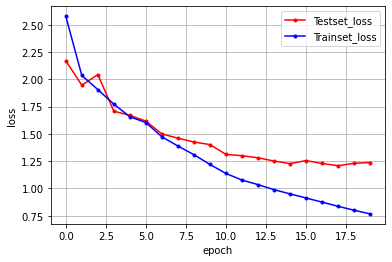

In [72]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
# 그래프에 그리드를 추가하고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()